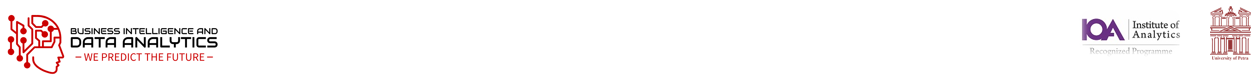

# Introduction to Non-Linear Models

## Topics and Outcomes
-
-


### Non-Linear Models

In [10]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load dataset
data = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Prepare dataset for regression and implement multiple regression

In [11]:
df['MedHouseVal'] = data.target  # Target variable

# Independent variables (features) and dependent variable (target)
X = df.drop('MedHouseVal', axis=1)  # Features
y = df['MedHouseVal']  # Target (Median house value)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and display evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Display the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

Mean Squared Error: 0.56
R-squared: 0.58
Intercept: -37.02327770606394
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]


The **California Housing dataset** is a well-known dataset, but achieving high performance using a simple linear regression model on this dataset can be challenging for several reasons. The results you observed, such as the **Mean Squared Error (MSE)** of 0.56 and an **R-squared (R²)** of 0.58, suggest that the linear model is not capturing the complexity of the data well.

### Ploting Performance
We can create various plots to visualize the performance of your multiple linear regression model. Below are some common plots used to evaluate regression models, including the actual vs predicted plot, residual plot, and distribution of residuals.

### 1. Actual vs Predicted Plot:
This plot shows how well the predicted values match the actual values. Ideally, all points should lie on the line y = x (i.e., the 45-degree diagonal line), indicating perfect predictions.

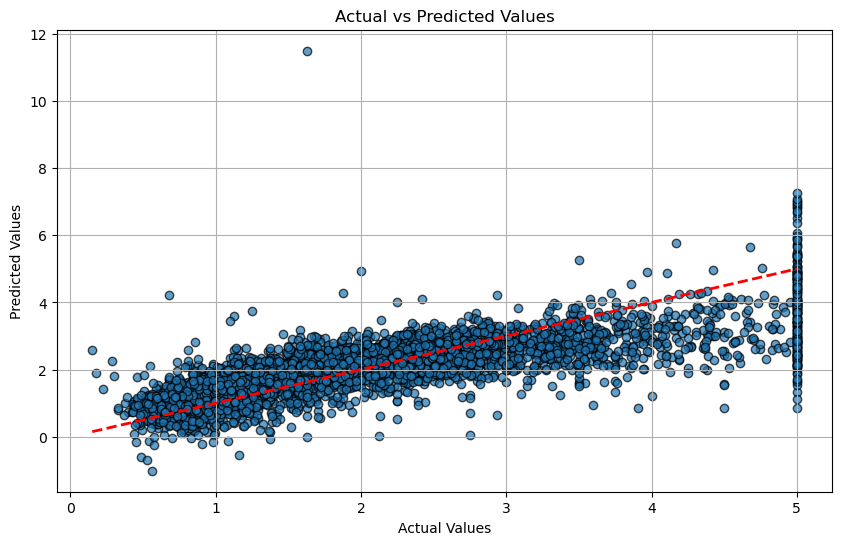

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

#### 2. Histogram of Residuals:
A histogram helps to check if the residuals are normally distributed, which is an assumption for linear regression models.

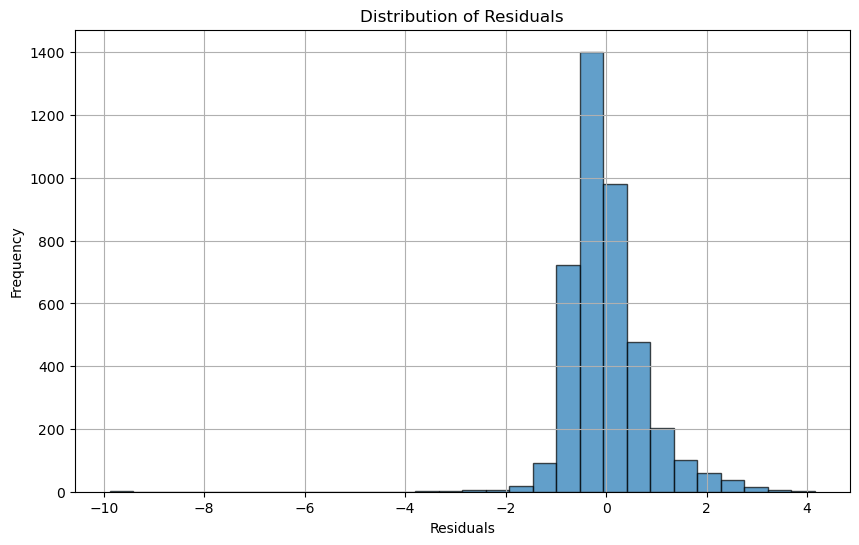

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 3. Q-Q Plot (Quantile-Quantile Plot):
The Q-Q plot is another way to check if the residuals are normally distributed. The residuals should fall along the 45-degree line if they are normally distributed.

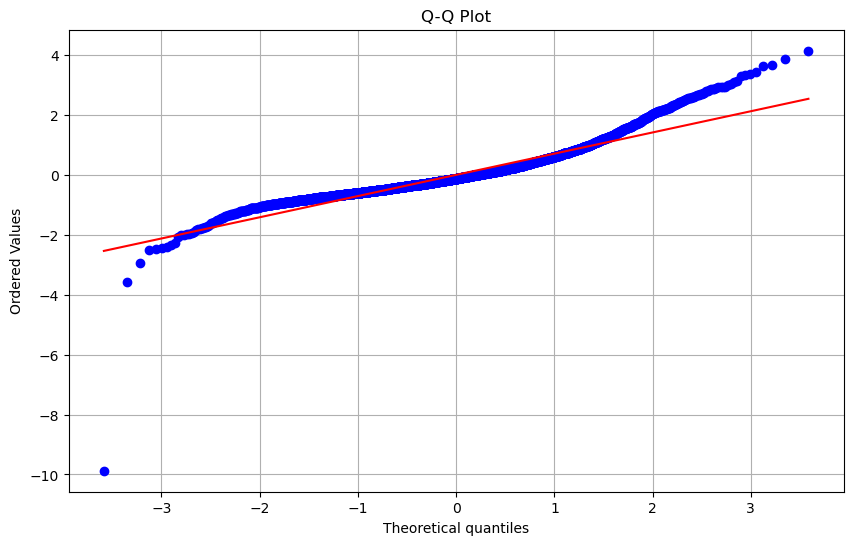

In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.grid(True)
plt.show()

### 4. Residual Plot:
The residuals (difference between actual and predicted values) should ideally be randomly distributed. A residual plot helps to check if the residuals are spread randomly around zero, indicating a good fit.

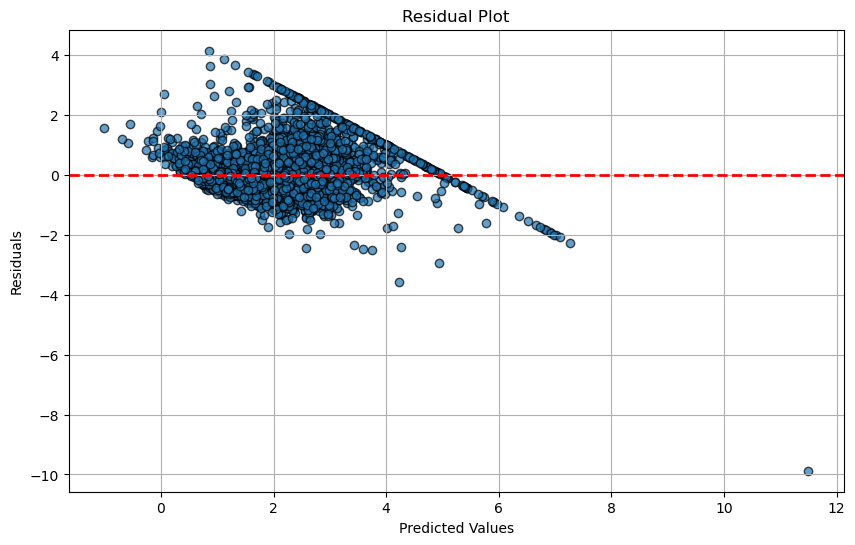

In [8]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolor='k', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Looking at your **residual plot**, it appears that the residuals exhibit a pattern, which is concerning because a good linear regression model should have randomly distributed residuals without any clear pattern or structure.

Here are a few insights from the plot:

1. **Pattern in the Residuals**:
   - The residuals seem to decrease as the predicted values increase, forming a wedge shape. This indicates that your model might be **underfitting** or **misspecified**.
   - A wedge shape or pattern in residuals could suggest **heteroscedasticity** (non-constant variance of the errors), meaning the model's error terms are not equally spread across all levels of predicted values.

2. **Negative Bias for Larger Predictions**:
   - The residuals tend to be negative for larger predicted values (around 10 to 12), indicating the model is consistently **overestimating** these values. This suggests the model may not capture some non-linear relationships in the data well.

### Next Steps to Address These Issues:

1. **Check for Non-linearity**:
   - The pattern might indicate that your relationship between features and target variable is not perfectly linear. Consider adding **polynomial features** or using a **non-linear regression** model if necessary.

2. **Check for Multicollinearity**:
   - If your features are highly correlated, the model may perform poorly. You can check this by calculating the **Variance Inflation Factor (VIF)** for each feature.

3. **Apply Feature Transformation**:
   - Try applying transformations to the features (e.g., log, square root) to capture non-linear relationships and reduce heteroscedasticity.

4. **Consider Using More Robust Models**:
   - If the linear assumptions are too restrictive, consider using more advanced regression techniques such as **Ridge Regression**, **Lasso Regression**, or even **Random Forests** if you need to handle non-linearity.

Would you like assistance with any of these next steps, or would you prefer generating other performance plots (e.g., Q-Q plot, actual vs predicted)? Let me know!

### Reasons Why Linear Regression Performs Poorly on the California Housing Dataset:

1. **Non-linear Relationships**:
   - The features in the dataset likely have **non-linear relationships** with the target variable (median house value). A linear model struggles to capture these relationships. Advanced models, such as decision trees or gradient boosting, often perform better.

2. **Feature Scaling**:
   - Some features in the dataset have different scales, and linear regression models can be sensitive to this. For example, `AveRooms` (average number of rooms per household) and `HouseAge` have very different scales. Feature scaling (e.g., using StandardScaler or MinMaxScaler) might improve performance slightly.

3. **High Variance in Target Variable**:
   - The target variable (median house value) might have a high variance or distribution skew. Some extreme values (outliers) in house prices can significantly affect the model's performance.

4. **Multicollinearity**:
   - Some of the independent variables in the dataset could be highly correlated with each other. This multicollinearity can confuse the linear regression model, leading to poor coefficient estimates and lower predictive power.

5. **Missing Complex Interactions**:
   - The simple linear model does not capture complex interactions between features. For example, the relationship between house age and median value might depend on the location or proximity to urban centers, which linear models do not account for unless you create interaction terms manually.

### Commonly Used Approaches for the California Housing Dataset:

1. **Polynomial Regression**:
   - Adding polynomial features can help capture non-linear relationships between features and the target variable. However, this can make the model more complex and prone to overfitting if not carefully tuned.

2. **Regularization (Ridge, Lasso)**:
   - Applying Ridge or Lasso regression can help deal with multicollinearity and stabilize the coefficient estimates.

3. **Tree-based Models**:
   - Models like **Random Forests** and **Gradient Boosting** (e.g., XGBoost, LightGBM) often achieve better performance on this dataset. They can naturally handle non-linear relationships and complex feature interactions.
   
4. **Neural Networks**:
   - Some implementations also use simple **feedforward neural networks** to improve performance, though tree-based models are typically preferred for structured data like this.

### What to Expect with More Advanced Models:
- **R-squared values** around 0.8 to 0.85 are common for tree-based models on this dataset.
- **Mean Squared Error** should drop significantly compared to a linear model.

In conclusion, the California Housing dataset is challenging for simple linear regression due to its complexity and non-linear relationships. It's common to see much better performance using tree-based models or other advanced methods. Would you like to explore one of these alternative approaches further?

### Example: Using a Decision Tree Model

Here’s an example of how you could try a more complex model like **Decision Trees** on the dataset to see if it improves performance:

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree MSE: {mse_tree:.2f}")
print(f"Decision Tree R-squared: {r2_tree:.2f}")


Decision Tree MSE: 0.50
Decision Tree R-squared: 0.62


The performance improved slightly with a **Mean Squared Error (MSE)** of 0.50 and an **R-squared** of 0.62. This indicates that the decision tree model is capturing more of the non-linear relationships in the dataset compared to linear regression, but there’s still room for improvement.

If you'd like to optimize further or try other approaches, here are a few suggestions:

### 1. **Hyperparameter Tuning**:
   Decision trees can overfit or underfit depending on the depth and structure. You can improve the model by tuning hyperparameters such as `max_depth`, `min_samples_split`, and `min_samples_leaf`.

```python
from sklearn.model_selection import GridSearchCV

# Define the parameters for grid search
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Create a Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_tree_model = grid_search.best_estimator_
y_pred_tree_tuned = best_tree_model.predict(X_test)
mse_tree_tuned = mean_squared_error(y_test, y_pred_tree_tuned)
r2_tree_tuned = r2_score(y_test, y_pred_tree_tuned)

print(f"Tuned Decision Tree MSE: {mse_tree_tuned:.2f}")
print(f"Tuned Decision Tree R-squared: {r2_tree_tuned:.2f}")
```

### 2. **Random Forest Regressor**:
   If the decision tree is still not performing as well as you'd like, a **Random Forest Regressor** can be a great next step. It uses an ensemble of decision trees to reduce overfitting and improve performance.

```python
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R-squared: {r2_rf:.2f}")
```

### 3. **Gradient Boosting Regressor**:
   Another powerful model you can try is **Gradient Boosting**, which often yields high performance by combining weak learners in a sequential manner to minimize errors.

```python
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting MSE: {mse_gb:.2f}")
print(f"Gradient Boosting R-squared: {r2_gb:.2f}")
```

### Next Steps:
- **Random Forest** and **Gradient Boosting** are both more robust options and should improve your model performance significantly.
- **Hyperparameter tuning** on decision trees or more advanced models can also give a noticeable boost in performance.

### Hyperparameter Tuning using Grid Search

In [6]:
from sklearn.model_selection import GridSearchCV

# Define the parameters for grid search
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Create a Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_tree_model = grid_search.best_estimator_
y_pred_tree_tuned = best_tree_model.predict(X_test)
mse_tree_tuned = mean_squared_error(y_test, y_pred_tree_tuned)
r2_tree_tuned = r2_score(y_test, y_pred_tree_tuned)

print(f"Tuned Decision Tree MSE: {mse_tree_tuned:.2f}")
print(f"Tuned Decision Tree R-squared: {r2_tree_tuned:.2f}")


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2}
Tuned Decision Tree MSE: 0.36
Tuned Decision Tree R-squared: 0.72


### Try RandomForest Regressor

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R-squared: {r2_rf:.2f}")


Random Forest MSE: 0.26
Random Forest R-squared: 0.81


<hr>

### Example Dataset and Python Code for Multiple Linear Regression

We will use the **Auto MPG Dataset** to demonstraste multiple linea regression. Using this datase we will predict the miles per gallon (MPG) of various cars based on features like the number of cylinders, horsepower, and weight. This dataset is simple, clean, and ideal for demonstrating linear regression.

### **Auto MPG Dataset**:

- **Source**: Available in the `seaborn` library as part of its dataset collection.
- **Description**: The dataset contains information about cars, such as the number of cylinders, horsepower, weight, and origin, and the target variable is `mpg` (miles per gallon).

Here’s how you can load the **Auto MPG Dataset** and use it for multiple linear regression:

### Code to Load Dataset and Run Multiple Linear Regression:

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Auto MPG dataset from seaborn
df = sns.load_dataset('mpg').dropna()  # Drop rows with missing values

# Display the first few rows of the dataset
print(df.head())

# Features (independent variables) and target variable (dependent)
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = df['mpg']  # Target: miles per gallon

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and display evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Display the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')


Based on the results:

- **Mean Squared Error (MSE)**: 17.94
- **R-squared**: 0.65

These results indicate that the model explains about 65% of the variance in the data, which is a decent but not perfect fit. The **MSE** of 17.94 indicates the average squared error between the actual and predicted `mpg` values.

The coefficients suggest how each feature contributes to predicting the target (miles per gallon):

- **Negative coefficients**: Indicate that as features like `cylinders`, `displacement`, `horsepower`, `weight`, and `acceleration` increase, the predicted `mpg` decreases.

Plot the performance of the multiple linear regression model using the **Auto MPG** dataset. We'll generate two key plots:

1. **Actual vs Predicted Values Plot**: This shows how close the predicted values are to the actual values.
2. **Residual Plot**: This helps to check if the residuals (errors) are randomly distributed.

### Plot Performance


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# 1. Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.grid(True)
plt.show()

Looking at the **Actual vs Predicted Values** plot, we can observe the following:

### Key Observations:

1. **Trend Line**:
   - The red dashed line represents the perfect prediction line (i.e., where the predicted values would equal the actual values).
   - The predicted values do follow a roughly linear trend, meaning the model is capturing the general direction of the relationship between the features and the target (MPG).

2. **Underfitting**:
   - There’s clear **underfitting** at both lower and higher ranges of MPG:
     - For low MPG values (e.g., below 15), the model **underpredicts** many points.
     - For high MPG values (e.g., above 30), the model also **underpredicts** many points.
   - This suggests that the linear model is **too simple** and isn’t fully capturing the underlying non-linear relationships between the independent variables (e.g., `horsepower`, `weight`, etc.) and the target variable (`mpg`).

3. **Spread**:
   - The spread of predicted values around the actual values increases as the actual MPG value increases, particularly in the higher MPG range (20–30 MPG).
   - This indicates that the model is **less accurate** for higher MPG values and introduces more prediction error as MPG increases.

4. **Variance in Middle Range**:
   - In the middle range (around 20–30 MPG), the predicted values are somewhat better aligned with the actual values, although there’s still a notable spread.

### Conclusion:
- The plot shows that the **linear model** captures the general trend, but it **struggles to capture non-linear relationships** in the data, leading to underfitting, especially in extreme values (both low and high MPG).
- This is typical for data where the relationship between the independent and dependent variables is not strictly linear.

### Next Steps:
1. **Polynomial Regression**:
   - As discussed earlier, we might want to apply **Polynomial Regression** (higher-degree polynomial terms) to model the non-linear relationship better.
   
2. **Use More Complex Models**:
   - We can also try more advanced models such as **Decision Trees**, **Random Forests**, or **Gradient Boosting** to capture non-linearity more effectively.

In [ ]:
# 2. Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolor='k', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot')
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Optional: Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Description of the Plots:

1. **Actual vs Predicted Values**:
   - The plot should ideally have the points close to the red line, which represents the ideal scenario where actual values equal predicted values. Deviations from this line indicate the model's prediction error.

2. **Residual Plot**:
   - The residuals (errors) should be randomly distributed around zero. If you observe patterns in the residuals, it might indicate that your model is missing some non-linear relationship or that there is heteroscedasticity (non-constant variance).

3. **Histogram of Residuals** (Optional):
   - The residuals should ideally follow a normal distribution (centered at zero). This plot helps visualize if the error terms are normally distributed.

These plots provides a visual insight into the model's performance.

Polynomial regression is a form of regression analysis where the relationship between the independent variables and the dependent variable is modeled as an nth-degree polynomial. This can capture non-linear relationships between the features and the target variable that linear regression might miss.

### Steps to Apply Polynomial Regression:

1. **Create polynomial features**: This is done by transforming the existing features into higher-degree polynomials.
2. **Fit a linear regression model** to these polynomial features.
3. **Evaluate the performance** using metrics like Mean Squared Error (MSE) and R-squared (R²).

### Code for Polynomial Regression:

Here’s the code to apply polynomial regression using the **Auto MPG Dataset**:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the Auto MPG dataset
df = sns.load_dataset('mpg').dropna()  # Drop rows with missing values

# Features (independent variables) and target variable (dependent)
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = df['mpg']  # Target: miles per gallon

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 2 for this example)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on polynomial features
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Polynomial Regression (degree 2) MSE: {mse:.2f}')
print(f'Polynomial Regression (degree 2) R-squared: {r2:.2f}')

### Explanation of Code:
- **PolynomialFeatures(degree=2)**: This generates polynomial features up to degree 2 (quadratic terms). You can increase the degree to capture more complex relationships, but be careful of overfitting.
- **Linear Regression**: Once polynomial features are generated, we apply linear regression as usual.
- **Plots**: The same performance plots are generated to compare the performance of polynomial regression.

### Things to Try:
- **Increase the degree**: You can increase the degree of the polynomial to 3, 4, etc., to capture even more complex relationships. But remember, the higher the degree, the more likely it is to overfit the training data.
  
  Example:
  ```python
  poly = PolynomialFeatures(degree=3, include_bias=False)
  ```

- **Regularization**: Polynomial regression can lead to overfitting if the degree is too high. You can consider applying regularization techniques such as **Ridge** or **Lasso** regression to penalize large coefficients.

### Interpretation:
- Check the **R-squared** value after applying polynomial regression. A higher R-squared value compared to linear regression would indicate that the polynomial model captures more variance in the data.
- Look at the **residual plot** to see if the residuals are more randomly distributed, which would indicate a better fit.

Let me know how the polynomial regression performs and if you need help interpreting the results!